In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/reema/Desktop/ML/vehicles.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [5]:
df.odometer.isna().sum()

4400

In [6]:
df.drive.unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [7]:
df.sample(30)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
249716,7315916044,https://cnj.craigslist.org/cto/d/frenchtown-20...,central NJ,https://cnj.craigslist.org,3500,2000.0,ford,f250 diesel,fair,8 cylinders,...,full-size,pickup,green,https://images.craigslist.org/00a0a_8Z4kvQr7FR...,2000 F-250 with 7.3 Powerstroke. Trans needs w...,NaN,nj,40.489534,-75.051084,2021-05-02T16:34:31-0400
154675,7311960380,https://southbend.craigslist.org/cto/d/blissfi...,south bend / michiana,https://southbend.craigslist.org,25000,2014.0,ford,f-250,excellent,8 cylinders,...,full-size,truck,white,https://images.craigslist.org/00X0X_52CnKae4FX...,"2014 f250, 4wd, 6.7, automatic, 153,000 on dri...",NaN,in,41.827600,-83.877300,2021-04-24T13:50:12-0400
318322,7309237981,https://eugene.craigslist.org/ctd/d/eugene-202...,eugene,https://eugene.craigslist.org,26988,2020.0,ford,escape se automatic,NaN,NaN,...,NaN,SUV,silver,https://images.craigslist.org/00909_8NrMsEzdXq...,2020 Ford Escape SE Kendall Ford of Eugene☎ 8...,NaN,or,44.073070,-123.106920,2021-04-19T08:03:29-0700
349980,7305638795,https://myrtlebeach.craigslist.org/ctd/d/myrtl...,myrtle beach,https://myrtlebeach.craigslist.org,25990,2018.0,mitsubishi,outlander phev gt,good,NaN,...,NaN,SUV,NaN,https://images.craigslist.org/01313_ibWX72idJT...,Carvana is the safer way to buy a car During t...,NaN,sc,33.690000,-78.890000,2021-04-12T11:31:37-0400
108466,7314978374,https://sarasota.craigslist.org/ctd/d/lakeland...,sarasota-bradenton,https://sarasota.craigslist.org,35995,2016.0,ford,f-250 4x4 lifted,NaN,8 cylinders,...,NaN,truck,silver,https://images.craigslist.org/00X0X_jo3LUgfG3j...,"2016 FORD F-250 CREW-CAB 4X4 LIFTED 35""X 12.50...",NaN,fl,28.176200,-81.959100,2021-04-30T15:44:35-0400
311618,7314625230,https://bend.craigslist.org/ctd/d/portland-201...,bend,https://bend.craigslist.org,0,2011.0,jeep,wrangler rubicon sport uti,NaN,NaN,...,NaN,SUV,NaN,https://images.craigslist.org/00v0v_6N2GTk0Y2o...,2011 Jeep Wrangler Rubicon Sport Utility 2D ...,NaN,or,45.425821,-122.633035,2021-04-29T17:52:25-0700
99371,7311781698,https://jacksonville.craigslist.org/ctd/d/jack...,jacksonville,https://jacksonville.craigslist.org,22999,2000.0,bmw,m5,NaN,8 cylinders,...,NaN,sedan,black,https://images.craigslist.org/00404_f0aYaCoEBw...,This BMW M5 can be yours today!If you have bad...,NaN,fl,30.348000,-81.588200,2021-04-24T08:02:18-0400
224168,7310534724,https://billings.craigslist.org/ctd/d/billings...,billings,https://billings.craigslist.org,18999,2017.0,subaru,forester,like new,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/01111_5AISvDCaSs...,"2017 Subaru Forester *2.5i Premium *AWD, AWD, ...",NaN,mt,45.810582,-108.471338,2021-04-21T14:34:43-0600
259210,7316762506,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,22990,2019.0,volkswagen,golf sportwagen tsi s,good,NaN,...,NaN,wagon,NaN,https://images.craigslist.org/00K0K_x4u1ZPWfuM...,Carvana is the safer way to buy a car During t...,NaN,nm,35.110000,-106.620000,2021-05-04T10:11:23-0600
6205,7311451859,https://anchorage.craigslist.org/ctd/d/anchora...,anchorage / mat-su,https://anchorage.craigslist.org,17995,2015.0,chevrolet,impala lt v6,like new,6 cylinders,...,full-size,sedan,white,https://images.craigslist.org/00707_dvUXfsGelE...,"Frontier Auto Sales We accept trades! (tow it,...",NaN,ak,61.166252,-149.857916,2021-04-23T09:45:24-0800


In [8]:
#df.manufacturer.value_counts()

In [9]:
df.manufacturer.fillna('ford',inplace=True)
df.manufacturer

0             ford
1             ford
2             ford
3             ford
4             ford
            ...   
426875      nissan
426876       volvo
426877    cadillac
426878       lexus
426879         bmw
Name: manufacturer, Length: 426880, dtype: object

In [10]:
df.manufacturer.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
426875    False
426876    False
426877    False
426878    False
426879    False
Name: manufacturer, Length: 426880, dtype: bool

In [11]:
df.model.nunique()

29667

In [12]:
df.model.value_counts()

f-150                         8009
silverado 1500                5140
1500                          4211
camry                         3135
silverado                     3023
                              ... 
2500 hd silverado lt             1
fusion hybrid se automatic       1
ecosport se certified pre-       1
f700f                            1
tacoma sr5 4wd                   1
Name: model, Length: 29667, dtype: int64

In [13]:
df.year.isna()
#df.year.isna().sum()


0          True
1          True
2          True
3          True
4          True
          ...  
426875    False
426876    False
426877    False
426878    False
426879    False
Name: year, Length: 426880, dtype: bool

In [14]:
#cars = df.select_dtypes(include=['object','int64','float64']).copy()
#cars

from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X, y = cars.drop('price',axis=1), cars['price']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [15]:
df.manufacturer.fillna('ford',inplace=True)
df.manufacturer

0             ford
1             ford
2             ford
3             ford
4             ford
            ...   
426875      nissan
426876       volvo
426877    cadillac
426878       lexus
426879         bmw
Name: manufacturer, Length: 426880, dtype: object

In [16]:
con=df.condition.mode().describe()
con


count        1
unique       1
top       good
freq         1
dtype: object

In [17]:
df.condition.fillna('good',inplace=True)

In [18]:
df.condition.isnull().sum()

0

In [19]:
df.cylinders=df.cylinders.fillna(df.cylinders.mode())
cy=df.cylinders.mode().describe()
cy

count               1
unique              1
top       6 cylinders
freq                1
dtype: object

In [20]:
df.cylinders.fillna('6 cylinders',inplace=True)
df.cylinders.isnull().sum()

0

In [21]:
df.fuel=df.fuel.fillna(df.fuel.mode())
fu=df.fuel.mode().describe()
fu

count       1
unique      1
top       gas
freq        1
dtype: object

In [22]:
df.fuel.fillna('gas',inplace=True)
df.fuel.isnull().sum()

0

In [23]:
df.model=df.model.fillna(df.model.mode())
mo=df.model.mode().describe()
mo

count         1
unique        1
top       f-150
freq          1
dtype: object

In [24]:
df.model.fillna('f-150',inplace=True)
df.model.isnull().sum()

0

In [25]:
df.title_status=df.title_status.fillna(df.title_status.mode())
ts=df.title_status.mode().describe()
ts

count         1
unique        1
top       clean
freq          1
dtype: object

In [26]:
df.title_status.fillna('clean',inplace=True)
df.title_status.isnull().sum()

0

In [27]:
df.transmission=df.transmission.fillna(df.transmission.mode())
trs=df.transmission.mode().describe()
trs

count             1
unique            1
top       automatic
freq              1
dtype: object

In [28]:
df.transmission.fillna('automatic',inplace=True)
df.transmission.isnull().sum()

0

In [29]:
df.type=df.type.fillna(df.type.mode())
typ=df.type.mode().describe()
typ

count         1
unique        1
top       sedan
freq          1
dtype: object

In [30]:
df.type.fillna('sedan',inplace=True)
df.type.isnull().sum()

0

In [31]:
df.type=df.type.fillna(df.type.mode())
typ=df.type.mode().describe()
typ

count         1
unique        1
top       sedan
freq          1
dtype: object

In [32]:
df.type.fillna('sedan',inplace=True)
df.type.isnull().sum()

0

In [33]:
df.region=df.region.fillna(df.region.mode())
rg=df.region.mode().describe()
rg

count            1
unique           1
top       columbus
freq             1
dtype: object

In [34]:
df.region.fillna('columbus',inplace=True)
df.region.isnull().sum()

0

In [35]:
df.odometer.fillna(df.odometer.mean(),inplace=True)
df.odometer.isnull().sum()

0

In [36]:
df.paint_color=df.paint_color.fillna(df.paint_color.mode())
pc=df.paint_color.mode().describe()
pc

count         1
unique        1
top       white
freq          1
dtype: object

In [37]:
df.paint_color.fillna('white',inplace=True)
df.paint_color.isnull().sum()

0

In [38]:
df.VIN=df.VIN.fillna(df.VIN.mode())
vn=df.VIN.mode().describe()
vn

count                     1
unique                    1
top       1FMJU1JT1HEA52352
freq                      1
dtype: object

In [39]:
df.VIN.fillna('1FMJU1JT1HEA52352',inplace=True)
df.VIN.isnull().sum()

0

In [40]:
df.drive=df.drive.fillna(df.drive.mode())
drr=df.drive.mode().describe()
drr

count       1
unique      1
top       4wd
freq        1
dtype: object

In [41]:
df.drive.fillna('4wd',inplace=True)
df.drive.isnull().sum()

0

In [42]:
df.lat=df.lat.fillna(df.lat.mode())
la=df.lat.mode().describe()
la

count     1.000000
mean     33.779214
std            NaN
min      33.779214
25%      33.779214
50%      33.779214
75%      33.779214
max      33.779214
dtype: float64

In [43]:
df.lat.fillna('38.496482',inplace=True)
df.lat.isnull().sum()

0

In [44]:
df.long=df.long.fillna(df.long.mode())
lo=df.long.mode().describe()
lo

count     1.000000
mean    -84.411811
std            NaN
min     -84.411811
25%     -84.411811
50%     -84.411811
75%     -84.411811
max     -84.411811
dtype: float64

In [45]:
df.long.fillna('38.-84.411811',inplace=True)
df.long.isnull().sum()

0

In [46]:
df.dropna(subset = ["year"], inplace=True)

In [47]:
df.shape

(425675, 26)

In [48]:
df.drop(['county','url','region_url','size','image_url','description'],axis=1, inplace=True)


In [49]:
df.shape

(425675, 20)

In [49]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'type', 'paint_color', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
#fig.suptitle('number of reviews')
ax1.scatter(x='price',y='region_url',data=df)
ax2.scatter('price','image_url',data=df);
ax1.set_title('first');
#ax2.set_title('neighbourhood group');

In [50]:
#sns.pairplot(df)

In [50]:
df.isna().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
type            0
paint_color     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [57]:
Xmanufacturer=patsy.dmatrix('manufacturer',data=df,return_type='dataframe').reset_index()
Xmanufacturer.head()

,index,Intercept,manufacturer[T.alfa-romeo],manufacturer[T.aston-martin],manufacturer[T.audi],manufacturer[T.bmw],manufacturer[T.buick],manufacturer[T.cadillac],manufacturer[T.chevrolet],manufacturer[T.chrysler],...,manufacturer[T.pontiac],manufacturer[T.porsche],manufacturer[T.ram],manufacturer[T.rover],manufacturer[T.saturn],manufacturer[T.subaru],manufacturer[T.tesla],manufacturer[T.toyota],manufacturer[T.volkswagen],manufacturer[T.volvo]
0,27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
Xregion=patsy.dmatrix('region',data=df,return_type='dataframe').reset_index()
Xregion.head()

,index,Intercept,region[T.abilene],region[T.akron / canton],region[T.albany],region[T.albuquerque],region[T.altoona-johnstown],region[T.amarillo],region[T.ames],region[T.anchorage / mat-su],...,region[T.winchester],region[T.winston-salem],region[T.worcester / central MA],region[T.wyoming],region[T.yakima],region[T.york],region[T.youngstown],region[T.yuba-sutter],region[T.yuma],region[T.zanesville / cambridge]
0,27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#X=patsy.dmatrix('model',data=df,return_type='dataframe')
#X.head()

In [59]:
Xcondition=patsy.dmatrix('condition',data=df,return_type='dataframe').reset_index()
Xcondition.head()

,index,Intercept,condition[T.fair],condition[T.good],condition[T.like new],condition[T.new],condition[T.salvage]
0,27,1.0,0.0,1.0,0.0,0.0,0.0
1,28,1.0,0.0,1.0,0.0,0.0,0.0
2,29,1.0,0.0,1.0,0.0,0.0,0.0
3,30,1.0,0.0,1.0,0.0,0.0,0.0
4,31,1.0,0.0,0.0,0.0,0.0,0.0


In [56]:
Xcylinders=patsy.dmatrix('cylinders',data=df,return_type='dataframe').reset_index()
Xcylinders.head()

,index,Intercept,cylinders[T.12 cylinders],cylinders[T.3 cylinders],cylinders[T.4 cylinders],cylinders[T.5 cylinders],cylinders[T.6 cylinders],cylinders[T.8 cylinders],cylinders[T.other]
0,27,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,29,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,31,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [61]:
Xfuel=patsy.dmatrix('fuel',data=df,return_type='dataframe').reset_index()

Xfuel.head()

,index,Intercept,fuel[T.electric],fuel[T.gas],fuel[T.hybrid],fuel[T.other]
0,27,1.0,0.0,1.0,0.0,0.0
1,28,1.0,0.0,1.0,0.0,0.0
2,29,1.0,0.0,1.0,0.0,0.0
3,30,1.0,0.0,1.0,0.0,0.0
4,31,1.0,0.0,1.0,0.0,0.0


In [62]:
Xtitle_status=patsy.dmatrix('title_status',data=df,return_type='dataframe').reset_index()
Xtitle_status.head()

,index,Intercept,title_status[T.lien],title_status[T.missing],title_status[T.parts only],title_status[T.rebuilt],title_status[T.salvage]
0,27,1.0,0.0,0.0,0.0,0.0,0.0
1,28,1.0,0.0,0.0,0.0,0.0,0.0
2,29,1.0,0.0,0.0,0.0,0.0,0.0
3,30,1.0,0.0,0.0,0.0,0.0,0.0
4,31,1.0,0.0,0.0,0.0,0.0,0.0


In [69]:
dum1 = pd.merge(Xcondition, Xmanufacturer, on = 'index')
dum1 = pd.merge(dum1, Xfuel, how = 'inner')
dum1 = pd.merge(dum1,Xtitle_status, how = 'inner')
#dum1 = pd.merge(dum1, dum_drive, how = 'inner')
dum1 = pd.merge(dum1, Xcylinders, how = 'inner')
dum1.head()

,index,Intercept_x,condition[T.fair],condition[T.good],condition[T.like new],condition[T.new],condition[T.salvage],Intercept_y,manufacturer[T.alfa-romeo],manufacturer[T.aston-martin],...,title_status[T.parts only],title_status[T.rebuilt],title_status[T.salvage],cylinders[T.12 cylinders],cylinders[T.3 cylinders],cylinders[T.4 cylinders],cylinders[T.5 cylinders],cylinders[T.6 cylinders],cylinders[T.8 cylinders],cylinders[T.other]
0,27,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,29,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,31,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [71]:
df_1 = df[['year','odometer']].reset_index()
df_1 = pd.merge(df_1, dum1, on = 'index')
df_1 = df_1.drop(columns = ['index'])
df_1.head()

,year,odometer,Intercept_x,condition[T.fair],condition[T.good],condition[T.like new],condition[T.new],condition[T.salvage],Intercept_y,manufacturer[T.alfa-romeo],...,title_status[T.parts only],title_status[T.rebuilt],title_status[T.salvage],cylinders[T.12 cylinders],cylinders[T.3 cylinders],cylinders[T.4 cylinders],cylinders[T.5 cylinders],cylinders[T.6 cylinders],cylinders[T.8 cylinders],cylinders[T.other]
0,2014.0,57923.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2010.0,71229.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2020.0,19160.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2017.0,41124.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2013.0,128000.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
df_1.corr()

,year,odometer,Intercept_x,condition[T.fair],condition[T.good],condition[T.like new],condition[T.new],condition[T.salvage],Intercept_y,manufacturer[T.alfa-romeo],...,title_status[T.parts only],title_status[T.rebuilt],title_status[T.salvage],cylinders[T.12 cylinders],cylinders[T.3 cylinders],cylinders[T.4 cylinders],cylinders[T.5 cylinders],cylinders[T.6 cylinders],cylinders[T.8 cylinders],cylinders[T.other]
year,1.000000,-0.156600,NaN,-0.182816,0.114312,0.007978,0.011770,-0.042861,NaN,0.028000,...,-0.042459,0.013883,-0.014394,-0.013487,0.003873,0.027191,-0.023725,0.112110,-0.163461,-0.016558
odometer,-0.156600,1.000000,NaN,0.075873,-0.037283,-0.005919,-0.013743,0.028337,NaN,-0.013633,...,0.035243,-0.004209,0.009843,-0.002010,-0.007584,0.003526,0.010193,-0.028157,0.030226,0.008252
Intercept_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition[T.fair],-0.182816,0.075873,NaN,1.000000,-0.190326,-0.029086,-0.007049,-0.004780,NaN,-0.004613,...,0.020773,0.004243,0.029189,0.002269,0.003707,0.014463,0.013583,-0.052381,0.045875,0.016812
condition[T.good],0.114312,-0.037283,NaN,-0.190326,1.000000,-0.342593,-0.083028,-0.056299,NaN,0.024369,...,-0.008946,-0.064144,-0.021753,-0.011831,-0.012800,-0.186701,-0.023458,0.226682,-0.088179,-0.011771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cylinders[T.4 cylinders],0.027191,0.003526,NaN,0.014463,-0.186701,0.075941,0.008162,0.010042,NaN,-0.007691,...,-0.004791,0.070341,0.035428,-0.010440,-0.018392,1.000000,-0.029932,-0.624394,-0.212125,-0.026050
cylinders[T.5 cylinders],-0.023725,0.010193,NaN,0.013583,-0.023458,0.003214,-0.001510,0.006507,NaN,-0.002920,...,0.000351,0.006780,0.000956,-0.001408,-0.002481,-0.029932,1.000000,-0.084237,-0.028618,-0.003514
cylinders[T.6 cylinders],0.112110,-0.028157,NaN,-0.052381,0.226682,-0.093356,-0.017032,-0.012236,NaN,0.023477,...,0.000184,-0.045173,-0.022974,-0.029380,-0.051760,-0.624394,-0.084237,1.000000,-0.596989,-0.073312
cylinders[T.8 cylinders],-0.163461,0.030226,NaN,0.045875,-0.088179,0.038727,0.009755,0.001447,NaN,-0.020695,...,0.000179,-0.014184,-0.007287,-0.009981,-0.017584,-0.212125,-0.028618,-0.596989,1.000000,-0.024906


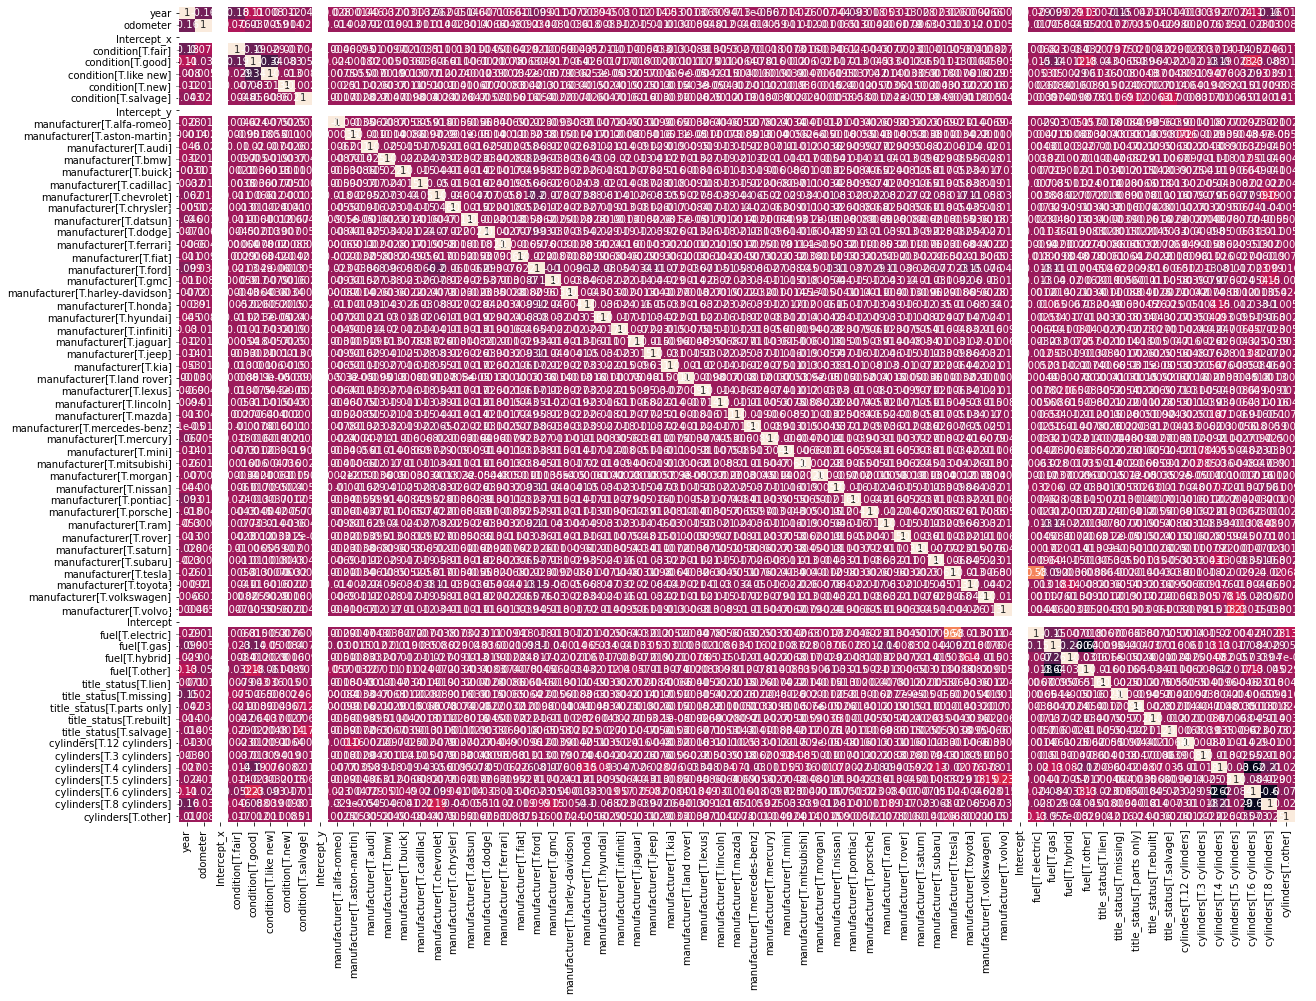

In [73]:
plt.subplots(figsize=(20,15))
dataplot = sns.heatmap(df_1.corr(),cbar=False, annot=True)

In [ ]:
#sns.pairplot(df[:1000], plot_kws=dict(alpha=.1, edgecolor='none'))

In [ ]:
#cars=columes=[..]

In [ ]:
#اللي بعد هذا يبغاله مراجعه


In [ ]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X, y = cars.drop('price',axis=1), cars['price']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [ ]:
# valid
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [ ]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')